In [27]:
import numpy as np
import matplotlib.cm as cm
import random
from matplotlib import pyplot as plt

In [28]:
class C_Means():
    def __init__(self, dataset, n_clusters=3, fuzzy=2, cut_param=.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy = fuzzy
        self.cut_param = cut_param
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)]+1
        self.U = np.array([])
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def distribute_data(self):
        dist = np.array([[self.get_dist(i,j) for i in self.centroids] for j in self.dataset])
        self.U = (1/dist)**self.fuzzy
        self.U = self.U / self.U.sum(axis=1)[:,None]        
        
    def recalculate_centroids(self):
        self.centroids = (self.U.T).dot(self.dataset) / self.U.sum(axis=0)[:,None]
        
    def normalize_arr(self):
            arr_with_inf = np.where(np.isinf(self.U))
            lines = arr_with_inf[0]
            rows = arr_with_inf[1]
            for i in range(0, len(lines)):
                self.U[lines[i]] = 0
                self.U[lines[i]][rows[i]] = 1
            
    def fit(self):
        iter = 1
        while iter<self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i,j) for i,j in zip(self.centroids,prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
        
    def get_labels(self):
        list_max = self.U.max(axis=1)
        list_max_labels = np.argmax(self.U, axis=1)
        self.labels = np.array([idx+1 if list_max[k]>self.cut_param \
                                else 0 for k,idx in \
                                enumerate(list_max_labels)])
        
    def cluster(self):
            labels = np.array([])
            for i in range(len(self.U)):
                i_max = self.U[i][0]
                i_max_indx = 0
                for j in range(len(self.U[i])):
                    if (self.U[i][j] > i_max):
                        i_max = self.U[i][j]
                        i_max_indx = j
                if (i_max > self.cut_param):
                    labels = np.append(list(labels), i_max_indx + 1).astype(int)
                else:
                        labels = np.append(list(labels), 0).astype(int)
            return labels


In [29]:
n = 150
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(n // 2)])
dataset

array([[143.31992869,  70.62046971],
       [118.90567518,  45.35171007],
       [124.38699853,  43.24822663],
       [122.32123419,  33.03596338],
       [ 61.93294073, 137.51971247],
       [ 50.39197582,   2.45061467],
       [ 94.73968455, 101.98354204],
       [ 88.12602945,  56.4780644 ],
       [ 95.76363048,  46.56567704],
       [100.07068575, 120.00499208],
       [  4.17661359,  60.73011116],
       [ 35.64709423, 141.87561496],
       [ 64.86329893,  34.48904325],
       [ 66.56969386,  43.35884898],
       [101.04424235,  36.13777457],
       [ 66.82174098,  19.51427142],
       [ 81.39375226, 118.0895159 ],
       [ 67.40235302,  64.73759232],
       [ 60.18238038,   1.58321026],
       [ 80.99752869, 146.92919837],
       [143.62045574,  50.06007717],
       [ 48.51974222,  54.89565452],
       [130.8700421 , 123.46054134],
       [ 98.47475019,   7.02949884],
       [131.31796076, 138.60960654],
       [ 68.51447253, 102.23241907],
       [134.27683583, 141.23075791],
 

In [30]:
test = C_Means(dataset, 3, 2, .5)
test.fit()
pred = test.cluster()

In [38]:
x = np.arange(n)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

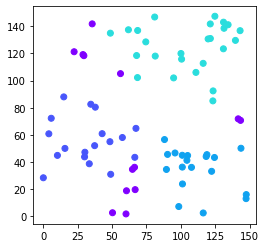

In [32]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()

PyGame

In [33]:
A1 = np.array([[np.random.uniform(0,20),np.random.uniform(0,20)] for k in range(1,8)])
print(A1)
num = 3
A2 = A1[np.random.choice(A1.shape[0], size=num, replace=False)]+1
print(A2)
A3 = np.zeros((A1.shape[0], num))

def dist(list1,list2):
    return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))

A4 = np.array([[dist(i,j) for i in A2] for j in A1])
print(A4)

np.seterr(divide='ignore')
m = .1
u = (1/A4)**(2/(m-1))
#um = (u / u.sum(axis=1)[:,None])

print(u)
print(u.sum(axis=1)[:,None])
print(u / u.sum(axis=1)[:,None])

[[13.63557025  1.46756577]
 [ 6.42438164  9.18840629]
 [18.65968933  7.11186988]
 [ 1.98722833  2.10074368]
 [ 9.9122923   8.93679561]
 [ 1.98831492 16.18092209]
 [14.01092488 19.18563446]]
[[10.9122923   9.93679561]
 [15.01092488 20.18563446]
 [ 2.98831492 17.18092209]]
[[ 8.89629681 18.7685294  18.98087493]
 [ 4.54988226 13.95233859  8.69981973]
 [ 8.24635473 13.57338581 18.62733981]
 [11.87688834 22.28631747 15.11337009]
 [ 1.41421356 12.35040201 10.76601524]
 [10.89157875 13.62446664  1.41421356]
 [ 9.75410395  1.41421356 11.20342814]]
[[128.63345062 675.84170665 692.95132197]
 [ 28.98828851 349.67132221 122.40539609]
 [108.67704114 328.91590505 664.59553058]
 [244.47145847 990.01253901 417.64080809]
 [  2.16011948 266.66006887 196.54207368]
 [201.67232363 331.67292599   2.16011948]
 [157.83167928   2.16011948 214.72912859]]
[[1497.42647924]
 [ 501.06500681]
 [1102.18847676]
 [1652.12480557]
 [ 465.36226203]
 [ 535.5053691 ]
 [ 374.72092735]]
[[0.08590302 0.45133549 0.4627615 ]
 [0

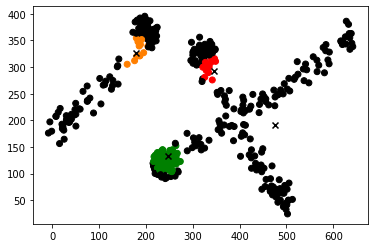

In [34]:
import pygame

data = np.empty((0,2), dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data,[coord],axis=0)
    
radius = 2
color = (0,0,255)
thickness = 0

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption('data generator')

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        createData(pygame.mouse.get_pos())
            
            
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen,color,(int(point[0]),int(point[1])),radius,thickness)
    pygame.display.flip()
    
pygame.quit()


cmeans = C_Means(data, 4, 3, .99)
cmeans.fit()
cmeans.get_labels()


import matplotlib.pyplot as plt
color_list = np.array(['black','red','green','blue','#ff7f00','#377eb8','yellow'])
plt.figure()
plt.scatter(data[:,0], data[:,1], c=color_list[cmeans.labels])
plt.scatter(cmeans.centroids[:,0], cmeans.centroids[:,1], c='black', marker='x')
plt.show()